<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
# Describe the dataset
description = boston_df.describe()
print(description)

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


<AxesSubplot:xlabel='MEDV'>

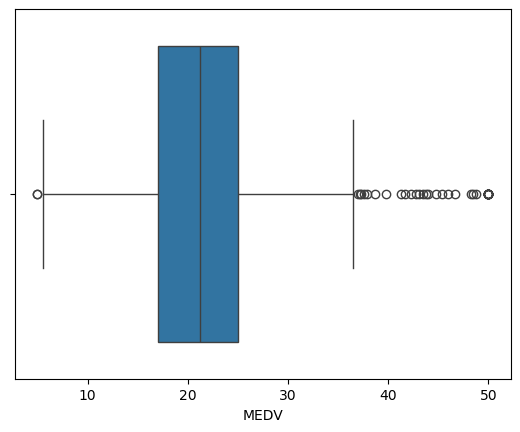

In [8]:
sns.boxplot(x=boston_df['MEDV'])
#This is a boxplot  Median value of owner occupied homes in $1000's

<AxesSubplot:xlabel='CHAS', ylabel='count'>

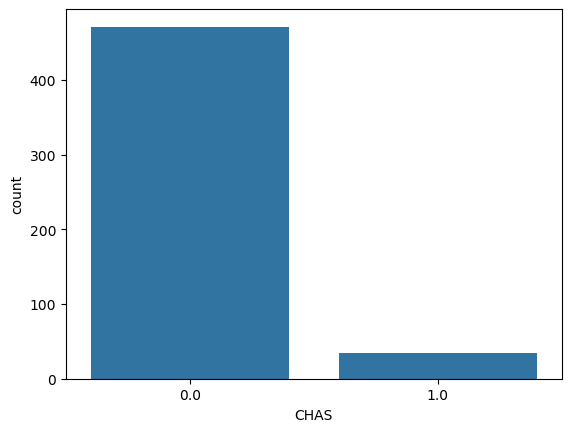

In [9]:
#Count the 0s and 1s and display in a bar chart
sns.countplot(x='CHAS', data=boston_df)

In [10]:
# Define bins and labels
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
# Discretize AGE
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
# Display
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,Between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,Between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


<AxesSubplot:xlabel='AGE_Group', ylabel='MEDV'>

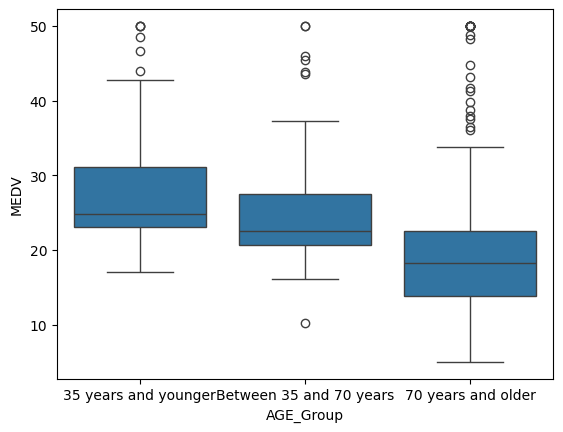

In [11]:
#Show boxplot of Age_Group vs MEDV
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

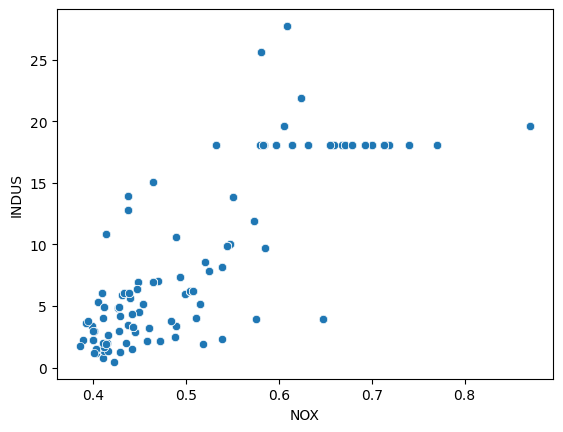

In [12]:
#Scatter Plot between NOX and INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
#Viewing below - there is a positive correlation between Nitric Oxide Concentration and Proportion of Non-Retail business acres

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

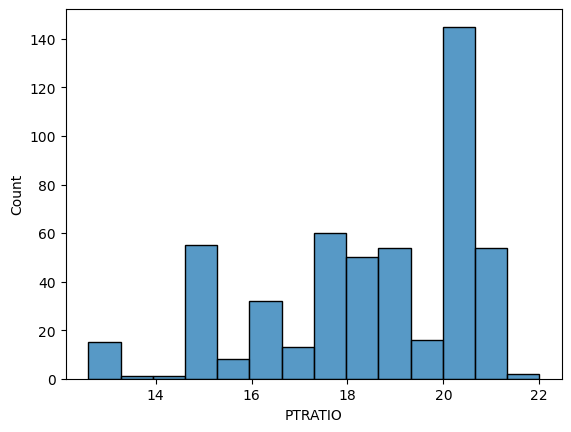

In [13]:
#Histogram of pupil to teacher ratio
sns.histplot(data=boston_df, x='PTRATIO')

In [14]:
from scipy import stats
#User T Test to find if significant difference exists for MEDV if CHAS = 0 vs 1
#NULL - no significant different exists
#Split Data
group1= boston_df.MEDV[boston_df.CHAS == 0]
group2= boston_df.MEDV[boston_df.CHAS == 1]
#t test comparing Group 1 to group 2
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


In [15]:
#p value is less than .05 so we reject null and conclude that there is a difference between the median values of housed bound by the river.  Those bound by river have mean of 28 and those not bound have mean of 22

In [16]:
#Check if any difference in means for value broken by age group.  Use anova at .05 to see if Null of no signficant difference is rejected
#Group the date into 3 categories
df=boston_df
group_low = df[df['AGE_Group'] == '35 years and younger']['MEDV']
group_middle = df[df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
group_high = df[df['AGE_Group'] == '70 years and older']['MEDV']
#Perform ANOVA
f_stat, p_value = stats.f_oneway(group_low, group_middle, group_high)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [17]:
#We reject the null as p value is less than .05.  We can conclude there is significan difference in median value based upon age group.

In [20]:
#Find if there is a correlation between NOX and INDUS
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df['NOX'],df['INDUS'])

print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


In [ ]:
#Correlation coefficient of .76 indicates strong positive correlation between the two variables.  We can reject null that NOX and INDUS do not have a relationship and conclude they do.

In [22]:
# Define independent (X) and dependent (y) variables
X = boston_df['DIS']
X = sm.add_constant(X)  # Add a constant term for the intercept
y = boston_df['MEDV']

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        12:39:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
## Null is that DIS does not impact Y.  However this is rejected at .05 as p value is less that .05.  While R is small, DIS does seem to contribute to MEDV